In [2]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from preprocessing import PreProcessing

In [3]:
bike_sharing_path = "/Users/Alessia/Desktop/Bike_Sharing/Bike-Sharing-Dataset/"
csv_hourly = "hour.csv"
csv_daily = "day.csv"

In [36]:
data_hourly = PreProcessing.load_data(bike_sharing_path, csv_hourly)
data_daily = PreProcessing.load_data(bike_sharing_path, csv_daily)

# dteday: date
# season: season (1:winter, 2:spring, 3:summer, 4:fall)
# yr: year (0: 2011, 1:2012)
# mnth: month (1 to 12)
# hr: hour (0 to 23)
# holiday: (0:no, 1:yes)
# weekday: day of the week 
# workingday: (0:no, 1:yes)
# weathersit:  
    #- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    #- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    #- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    #- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# hum: Normalized humidity. The values are divided to 100 (max)
# windspeed: Normalized wind speed. The values are divided to 67 (max)
# casual: count of casual users
# registered: count of registered users
# cnt: count of total rental bikes including both casual and registered

# Show firts rows
data_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Data information
data_hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Get number of rows and columns
data_hourly.shape

(17379, 17)

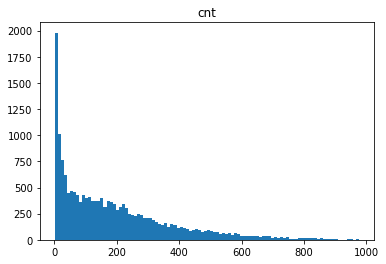

In [86]:
# Distribution of cnt (count rate) 

data_hourly.hist(column='cnt', bins=100)
plt.grid(False)
plt.show()

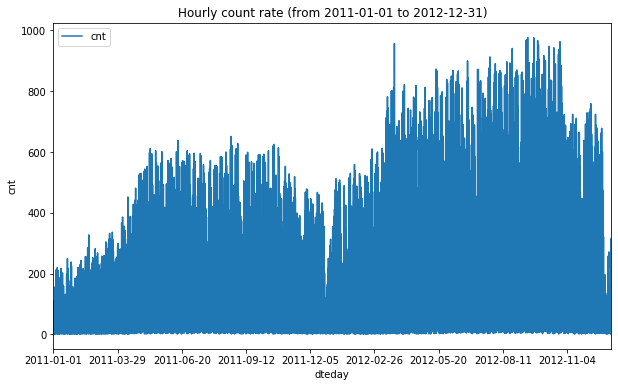

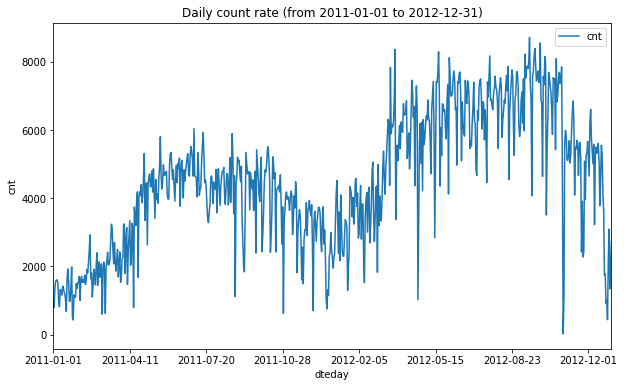

In [84]:
# Hourly and daily count rate

data_hourly.plot(x='dteday', y='cnt', figsize=(10,6))
plt.ylabel('cnt')
plt.title("Hourly count rate (from 2011-01-01 to 2012-12-31)")
plt.show()


data_daily.plot(x='dteday', y='cnt', figsize=(10,6))
plt.ylabel('cnt')
plt.title("Daily count rate (from 2011-01-01 to 2012-12-31)")
plt.show()


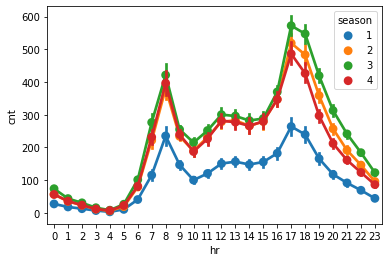

In [35]:
import seaborn as sb

"""sb.pointplot(data=data_hourly[['hr','cnt','season']],
              x='hr',
              y='cnt',
              hue='season')"""